In [329]:
import matplotlib.pyplot as plt
import altair 
import pandas as pd
import numpy as np

In [330]:
#Reading and Cleaning data 
data = pd.read_csv("/Users/deekshitamadhalam/Documents/TechChallenge_Data.xlsx - Sheet1.csv")
data['Month'] = pd.to_datetime(data['Month'], format='%b-%y')
del data["Month_num"]
del data["Year"]
data.rename(columns={"Month": "Date"}, inplace=True)

data

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes)
0,1985-01-01,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235
1,1985-01-01,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000
2,1985-01-01,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000
3,1985-01-01,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248
4,1985-01-01,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1989-07-01,Adelaide,Rome,Italy,0,0.000,0.000,48,0.000,0.000,48,0.000,0.000
9995,1989-07-01,Adelaide,San Francisco,USA,11,0.000,0.000,12,0.000,0.000,23,0.000,0.000
9996,1989-07-01,Adelaide,Singapore,Singapore,4340,139.170,3.074,3414,363.929,3.930,7754,503.099,7.004
9997,1989-07-01,Adelaide,Tokyo,Japan,422,2.690,0.000,98,2.914,0.096,520,5.604,0.096


## 1a

In [331]:
#Adds all types of traffic, to compare 
#Converted passengers to tons to be consistent 
data['Passengers_In_Tons'] = data["Passengers_Total"] / 16
data["Total_Traffic"] = data["Passengers_In_Tons"] + data["Freight_Total_(tonnes)"] + data["Mail_Total_(tonnes)"]

In [332]:
#Most Trafficked Route (Only based on Passenger)
max_row = data.sort_values(by='Passengers_Total', ascending=False).head(3)

In [333]:
#Least Trafficked Route (Only based on Passenger)
zero_rows = data[data['Passengers_Total'] == 0]
zero_rows.sort_values(by="Total_Traffic", ascending = True)

,Date,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Passengers_In_Tons,Total_Traffic
7595,1988-06-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
7921,1988-08-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
7789,1988-07-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
7726,1988-07-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
8183,1988-09-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
7531,1988-06-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
8320,1988-10-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
8383,1988-10-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
7985,1988-08-01,Sydney,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000
8119,1988-09-01,Melbourne,Nauru,Nauru,0,0.000,0.000,0,0.000,0.000,0,0.000,0.000,0.0,0.000


In [334]:
len(zero_rows)

44

In [335]:
#Most Trafficked Route
max_all_traffic = data.sort_values(by='Total_Traffic', ascending=False).head(3)
max_all_traffic = max_all_traffic[["Date","AustralianPort", "ForeignPort","Passengers_Total", "Total_Traffic"]]
max_all_traffic

,Date,AustralianPort,ForeignPort,Passengers_Total,Total_Traffic
8762,1988-12-01,Sydney,Auckland,66149,7353.5955
8361,1988-10-01,Sydney,Auckland,69939,7352.0965
6018,1987-10-01,Sydney,Auckland,67974,7329.0400


In [336]:
#Least Trafficked Route
zero_rows_total = data[data['Total_Traffic'] == 0]
zero_rows_total = zero_rows_total[["Date","AustralianPort", "ForeignPort","Passengers_Total"]]
zero_rows_total

,Date,AustralianPort,ForeignPort,Passengers_Total
7531,1988-06-01,Melbourne,Nauru,0
7595,1988-06-01,Sydney,Nauru,0
7726,1988-07-01,Melbourne,Nauru,0
7789,1988-07-01,Sydney,Nauru,0
7921,1988-08-01,Melbourne,Nauru,0
7985,1988-08-01,Sydney,Nauru,0
8119,1988-09-01,Melbourne,Nauru,0
8183,1988-09-01,Sydney,Nauru,0
8320,1988-10-01,Melbourne,Nauru,0
8383,1988-10-01,Sydney,Nauru,0


In [337]:
#Least Trafficked Routes but ignoring rows containing missing values
non_zero = data[data['Total_Traffic'] != 0]
non_zero = non_zero.sort_values(by="Total_Traffic", ascending = True).head(3)
non_zero = non_zero[["Date", "AustralianPort", "ForeignPort","Passengers_Total", "Total_Traffic"]]
non_zero

,Date,AustralianPort,ForeignPort,Passengers_Total,Total_Traffic
3222,1986-07-01,Townsville,Bangkok,0,0.001
9684,1989-05-01,Melbourne,Chicago,0,0.004
4599,1987-03-01,Darwin,Auckland,0,0.008


In [338]:
len(zero_rows_total)

10

In [396]:
#Groups by city pairs to see what city pair is the most traveled to
city_pairs = data.groupby(
    ['AustralianPort', 'ForeignPort']
)['Passengers_Total'].sum().reset_index()

city_pairs_most = city_pairs.sort_values(by="Passengers_Total", ascending=False)
city_pairs_most.head()


,AustralianPort,ForeignPort,Passengers_Total
228,Sydney,Auckland,2961212
280,Sydney,Singapore,1440018
281,Sydney,Tokyo,1292116
249,Sydney,Hong Kong,1151900
218,Perth,Singapore,952926


In [394]:
#To see what çity pair is the least traveled to 
city_pairs_least = city_pairs[city_pairs["Passengers_Total"]== 0]
city_pairs_least

,AustralianPort,ForeignPort,Passengers_Total
13,Adelaide,Harare,0
43,Brisbane,Chicago,0
45,Brisbane,Colombo,0
151,Melbourne,Denver,0
190,Perth,Bandar Seri Begawan,0


## 1b

In [339]:
# Group passengers by year
data['Year'] = data['Date'].dt.year
yearly_passengers = data.groupby('Year')['Passengers_Total'].sum()

yearly_passengers

Year
1985    5200373
1986    5818437
1987    6714432
1988    7766782
1989    3795339
Name: Passengers_Total, dtype: int64

In [340]:
#Group by number of passangers in each port
foreign_port_traffic = data.groupby('ForeignPort')['Passengers_Total'].sum()

#Top ports
foreign_port_traffic.sort_values(ascending=False)


ForeignPort
Auckland        5246876
Singapore       4130761
Hong Kong       2217453
Christchurch    1723832
Tokyo           1682712
                 ...   
Denver              329
Ljubljana           194
Malta               165
Dunedin              40
Chicago              31
Name: Passengers_Total, Length: 66, dtype: int64

In [341]:
#Least Popular Port
foreign_port_traffic.sort_values(ascending=True)

ForeignPort
Chicago              31
Dunedin              40
Malta               165
Ljubljana           194
Denver              329
                 ...   
Tokyo           1682712
Christchurch    1723832
Hong Kong       2217453
Singapore       4130761
Auckland        5246876
Name: Passengers_Total, Length: 66, dtype: int64

In [342]:
#Mail in tons over the years 
yearly_mail = data.groupby('Year')['Mail_Total_(tonnes)'].sum()
yearly_mail

Year
1985     4533.865
1986     4950.820
1987     5979.232
1988    11336.806
1989     7108.723
Name: Mail_Total_(tonnes), dtype: float64

In [343]:
#Freight in tons over the years 
yearly_freight = data.groupby('Year')['Freight_Total_(tonnes)'].sum()
yearly_freight

Year
1985    231001.517
1986    248738.658
1987    287930.749
1988    308883.651
1989    162312.770
Name: Freight_Total_(tonnes), dtype: float64

In [403]:
each_city = data.groupby('AustralianPort')['Passengers_Total'].sum()
each_city

AustralianPort
Adelaide            604937
Brisbane           3153897
Cairns              474393
Darwin              277604
Hobart               70312
Melbourne          6180004
Norfolk Island       91120
Perth              2811590
Port Hedland         21279
Sydney            15499688
Townsville          110539
Name: Passengers_Total, dtype: int64

## 1c

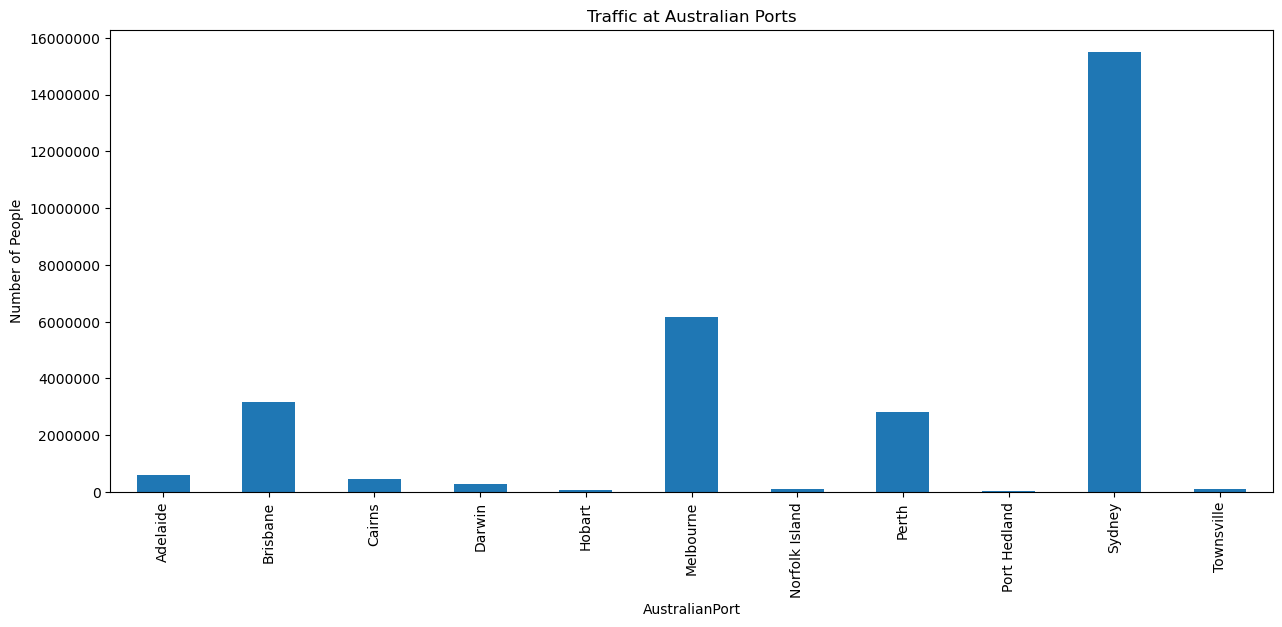

In [408]:
#Plotting Traffic at Australian Ports
plt.figure(figsize=(15,6))
each_city.plot(kind='bar')
plt.ylabel("Number of People")
plt.title("Traffic at Australian Ports")
#Allows the y axis to have numbers not scientific notation 
plt.ticklabel_format(style='plain', axis='y')


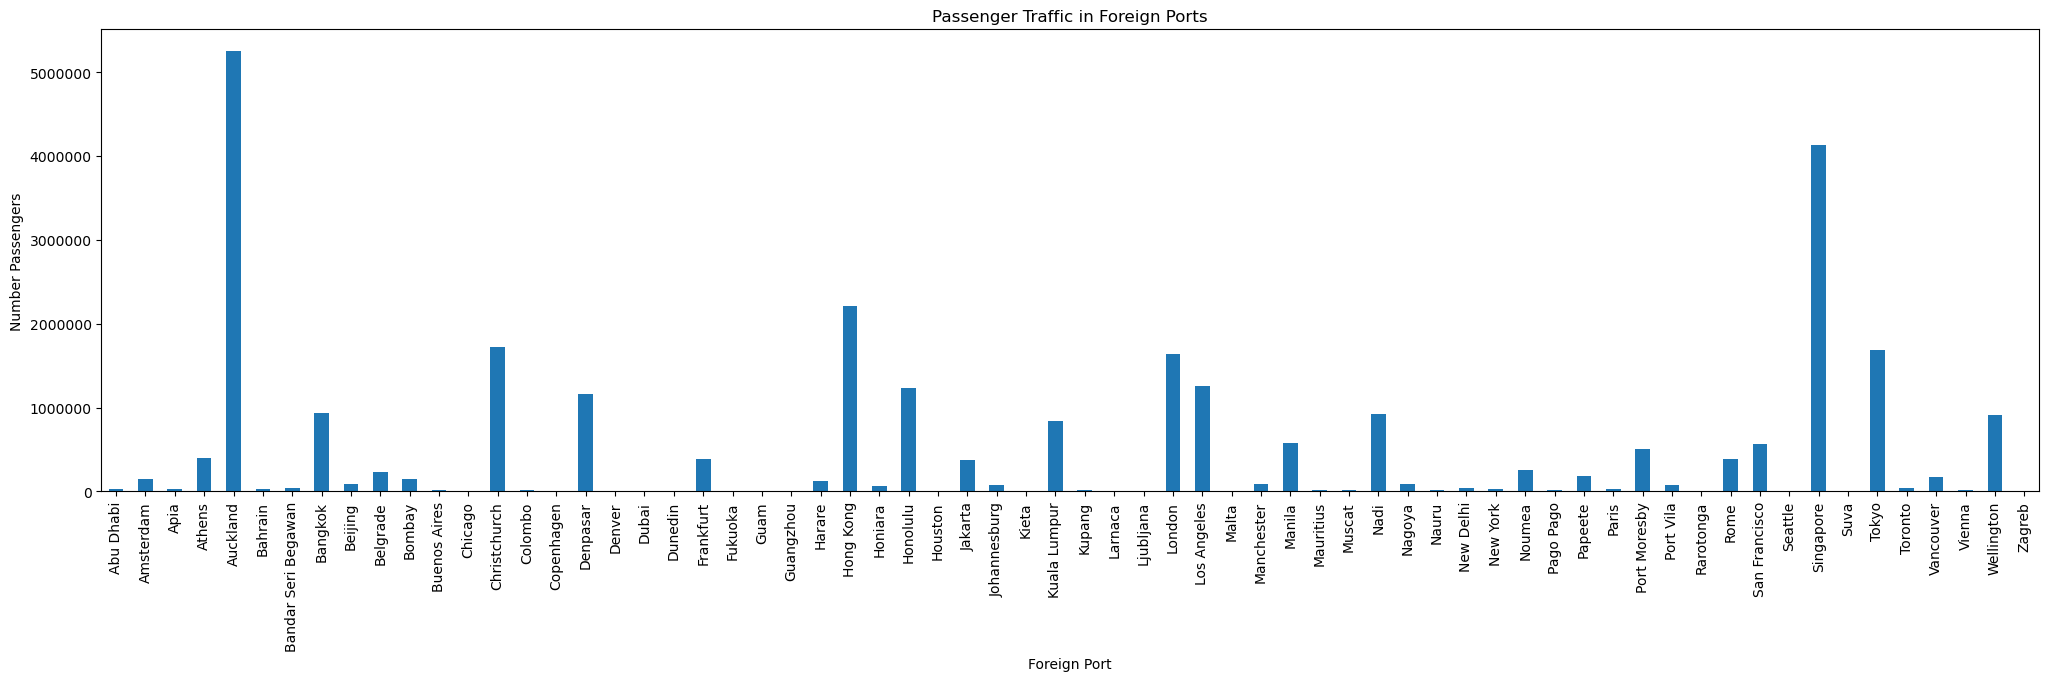

In [344]:
#Plotting the Traffic in Foreign Ports 
plt.figure(figsize=(25,6))
foreign_port_traffic.plot(kind='bar')
plt.title("Passenger Traffic in Foreign Ports")
plt.ylabel("Number Passengers")
plt.xlabel("Foreign Port")

#Allows the y axis to have numbers not scientific notation 
plt.ticklabel_format(style='plain', axis='y')

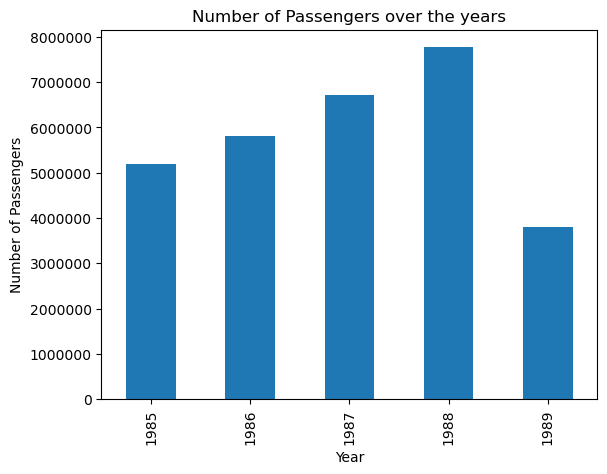

In [345]:
#Plots passenger travel over the years 
yearly_passengers.plot(kind='bar')
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers over the years")
plt.ticklabel_format(style='plain', axis='y')

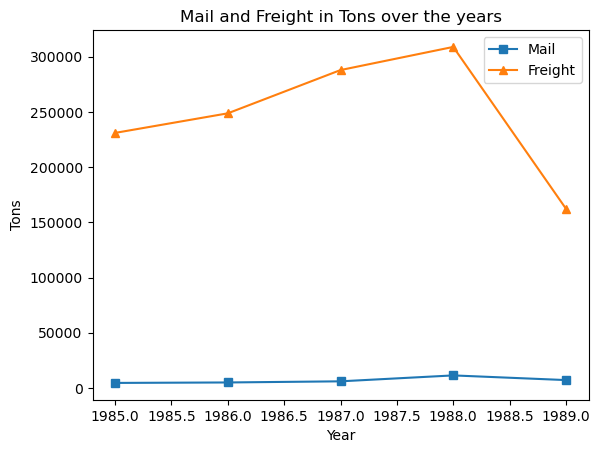

In [346]:
#Plots both freight and mail travel over the years 
plt.plot(yearly_mail, marker='s', label='Mail')
plt.plot(yearly_freight, marker='^', label='Freight')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Year")
plt.ylabel("Tons")
plt.title("Mail and Freight in Tons over the years")
plt.legend()

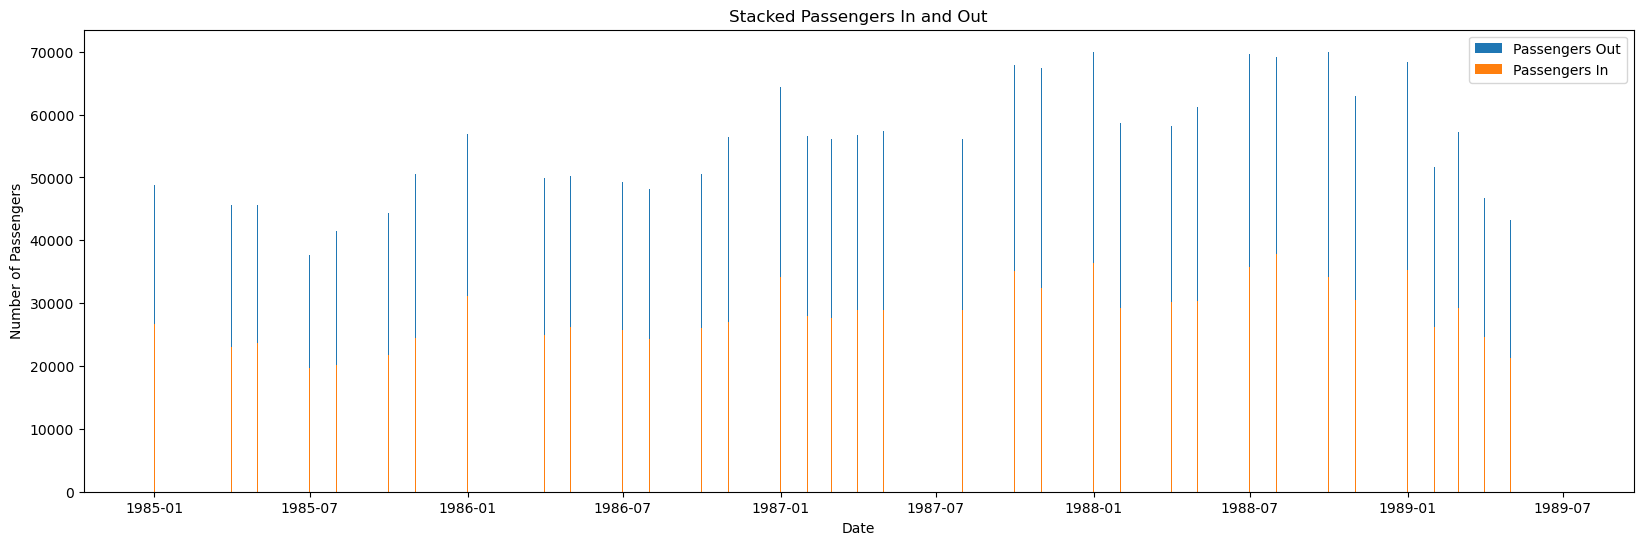

In [399]:
#Plots passengers in and out on top of eachother 
plt.figure(figsize=(20,6))

plt.bar(data['Date'], data['Passengers_Out'], bottom=data['Passengers_In'], label='Passengers Out')
plt.bar(data['Date'], data['Passengers_In'], label='Passengers In')
plt.title('Stacked Passengers In and Out')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()

## Question 2: Model 

In [363]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [364]:
#Allows for easier changing of ports to compare 
foreign_Port = 'Auckland'
Australian_Port = "Sydney"

In [365]:
#Only includes data that has these ports 
new_data = data[data['ForeignPort'] == foreign_Port]
new_data = new_data[new_data['AustralianPort'] == Australian_Port]

Text(0, 0.5, 'Number of Passengers')

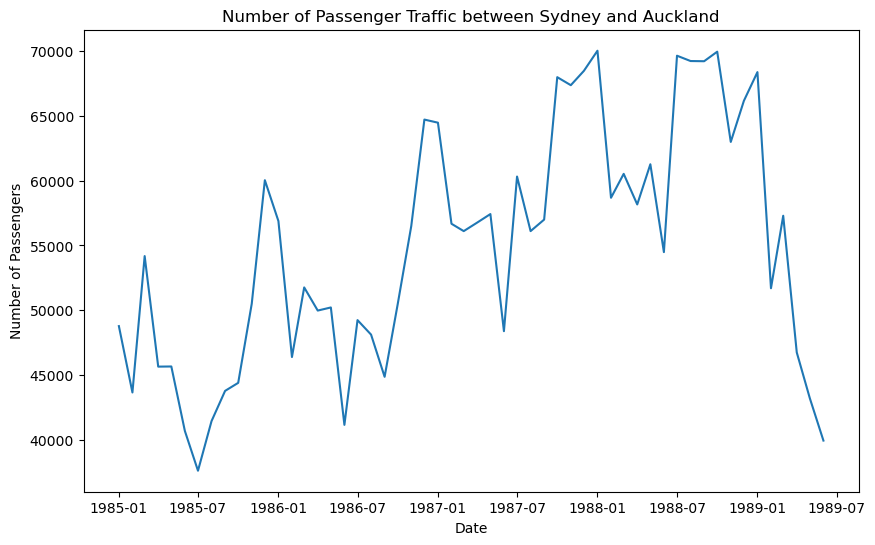

In [366]:
#Plots the historical data to get a visual 
plt.figure(figsize=(10,6))

plt.plot(new_data["Date"], new_data["Passengers_Total"])
plt.title("Number of Passenger Traffic between Sydney and Auckland")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")

/Users/deekshitamadhalam/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/deekshitamadhalam/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/deekshitamadhalam/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/deekshitamadhalam/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/deekshitamadhalam/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature 

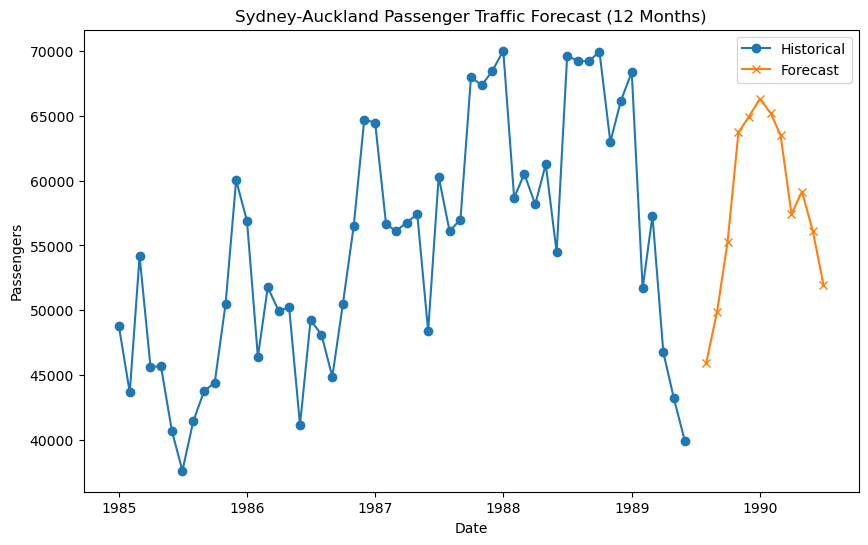

In [372]:
# Creating the lag features: Not a linear data set, lag gives it past months data. 
for lag in range(1, 13):  
    new_data[f'PassengersLag{lag}'] = new_data['Passengers_Total'].shift(lag)


#Using these lags to predict the total passengers (target)
features = ['PassengersLag1', 'PassengersLag2', 'PassengersLag3','PassengersLag4','PassengersLag5', 
            'PassengersLag6', 'PassengersLag7', 'PassengersLag8', 'PassengersLag9', 'PassengersLag10', 'PassengersLag11', 'PassengersLag12']
target = 'Passengers_Total'
X = new_data[features]
y = new_data[target]

# Training Data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# stores the future forcasts
futurePreds = []

#uses the last lag data to predict
lastRow = X.iloc[-1].values 

for i in range(12):
    pred = model.predict([lastRow])[0]
    futurePreds.append(pred)
    # Updates the lag it uses(new lag) to continue prediction 
    lastRow = [pred] + list(lastRow[:-1])

# plot past 
plt.figure(figsize=(10,6))
plt.plot(new_data['Date'], new_data['Passengers_Total'], marker='o', label='Historical')

#Gives the dates and makes it date time to be able to plot it
futureDates = [
    '1989-08', '1989-09', '1989-10', '1989-11', '1989-12',
    '1990-01', '1990-02', '1990-03', '1990-04', '1990-05',
    '1990-06', '1990-07']
futureDates = pd.to_datetime(futureDates, format='%Y-%m')

#Plots what we predict
plt.plot(futureDates, futurePreds, marker='x', label='Forecast')
plt.title('Sydney-Auckland Passenger Traffic Forecast (12 Months)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()


In [373]:
#MSE and RMSE to see how accurate model is 
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
rmse

Mean Squared Error (MSE): 5925278.770774693


2434.189551118543